<a href="https://colab.research.google.com/github/AyushWaghale/ML-Practicals/blob/ayush/Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement linear regression in Python on a Placement dataset**

In [4]:
pip install -U scikit-learn

In [11]:
import pandas as pd
import numpy as np

**Load the Dataset**

In [3]:
df = pd.read_csv('placement.csv')

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


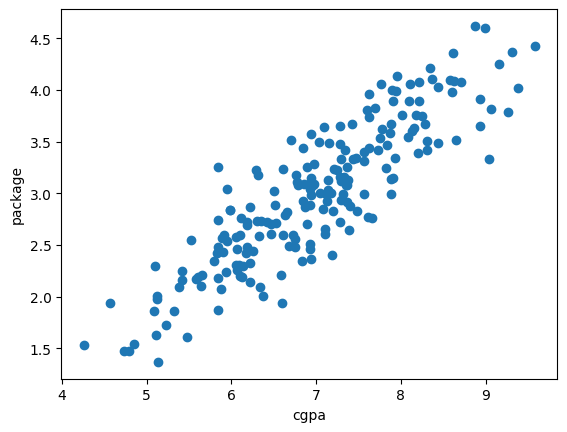

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

**Select Features and Target**

In [9]:
X = df['cgpa']
y = df['package']
X.shape,y.shape

((200,), (200,))

In [13]:
X = X.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
X.shape,y.shape

((200, 1), (200, 1))

**Split the Data into Training and Testing Sets**

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

**Train the Linear Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

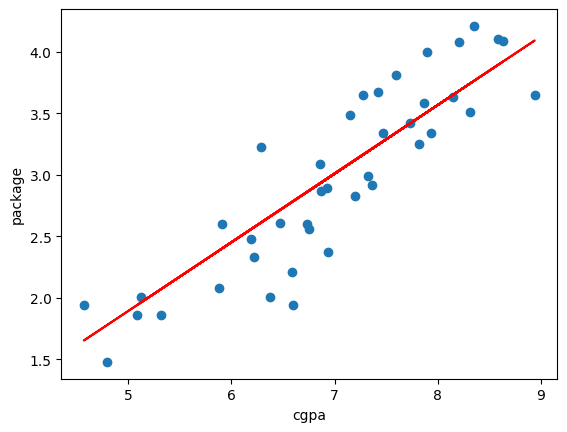

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error

In [25]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


In [26]:
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 0.2884710931878175
MSE: 0.12129235313495527
RMSE: 0.34827051717731616
R2: 0.780730147510384


In [27]:
pip install plotly.express

In [28]:
lr.coef_,lr.intercept_

(array([[0.55795197]]), array([-0.89611192]))

In [29]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go

In [33]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=5)
X.shape,y.shape

((100, 2), (100,))

In [37]:
df = pd.DataFrame({'feature1' : X[:,0] , 'feature2' : X[:,1] , 'target':y })

df.shape
df.head(100)

,feature1,feature2,target
0,-0.054377,-0.309374,-13.143049
1,-1.003207,-0.348871,-30.369190
2,-0.442016,0.337719,-12.366120
3,-0.586664,-1.254951,-46.750718
4,0.036437,-0.816105,-27.607056
...,...,...,...
95,-0.201780,0.750291,15.825533
96,0.193975,0.418476,12.122342
97,0.156353,-0.093384,-1.972649
98,-1.636187,-0.030079,-40.846639


In [38]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()